In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('BankNote_Authentication.csv')

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<Axes: xlabel='class', ylabel='count'>

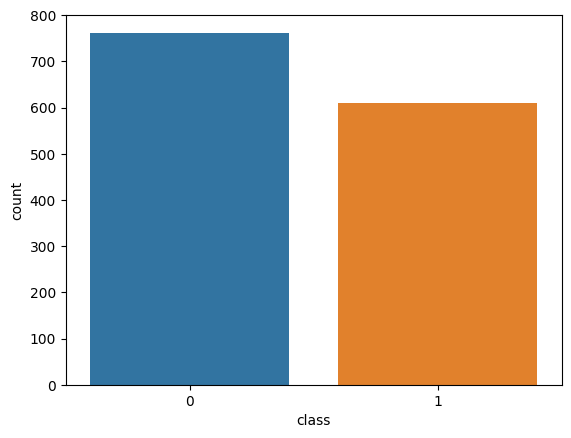

In [5]:
import seaborn as sns

sns.countplot(data=data,x='class')

<Axes: >

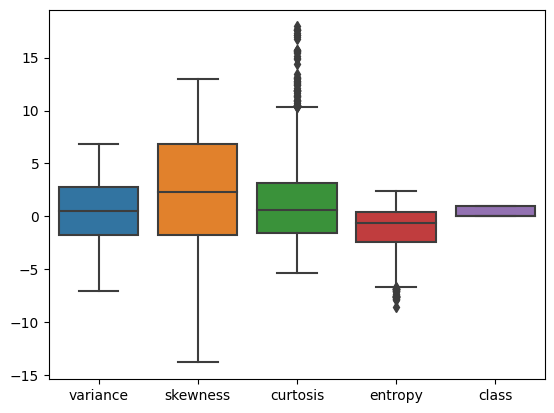

In [6]:
sns.boxplot(data=data)

c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


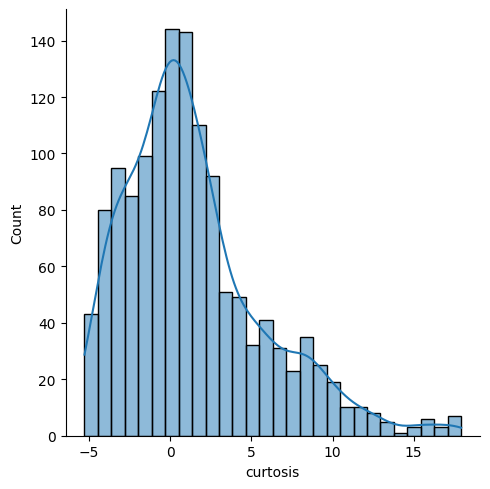

In [7]:
sns.displot(data['curtosis'],kde=True)

c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


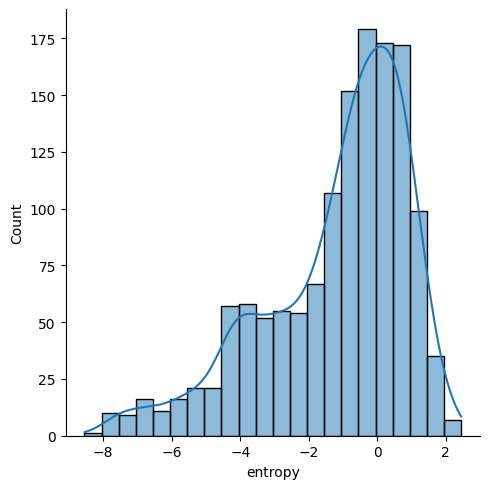

In [8]:
sns.displot(data['entropy'],kde=True)

In [9]:
data['curtosis'].describe()

count    1372.000000
mean        1.397627
std         4.310030
min        -5.286100
25%        -1.574975
50%         0.616630
75%         3.179250
max        17.927400
Name: curtosis, dtype: float64

In [10]:
percentile25 = data['curtosis'].quantile(0.25)
percentile75 = data['curtosis'].quantile(0.75)

In [11]:
iqr = percentile75 - percentile25
iqr

4.754225

In [12]:
upper_limit = percentile75 + 1.5 * iqr

In [13]:
lower_limit = percentile25 - 1.5*iqr

In [14]:
upper_limit ,lower_limit

(10.3105875, -8.7063125)

In [15]:
data['curtosis'] = np.where(data['curtosis']>upper_limit,upper_limit,np.where(data['curtosis']<lower_limit,lower_limit,data['curtosis']))

<Axes: >

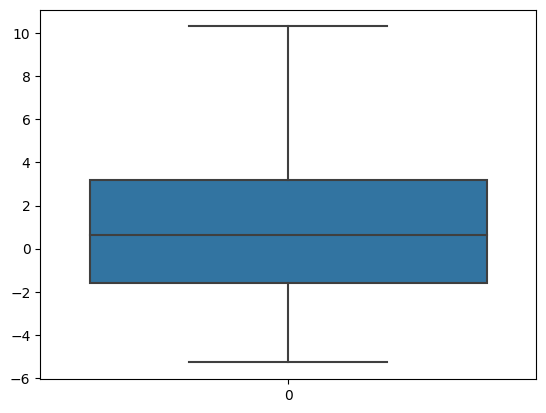

In [16]:
sns.boxplot(data['curtosis'])

In [17]:
percentile25 = data['entropy'].quantile(0.25)
percentile75 = data['entropy'].quantile(0.75)

In [18]:
iqr = percentile75 - percentile25


In [19]:
upper_limit = percentile75 + 1.5 * iqr

In [20]:
lower_limit = percentile25 - 1.5*iqr

In [21]:
data['entropy'] = np.where(data['entropy']>upper_limit,upper_limit,np.where(data['entropy']<lower_limit,lower_limit,data['entropy']))

<Axes: >

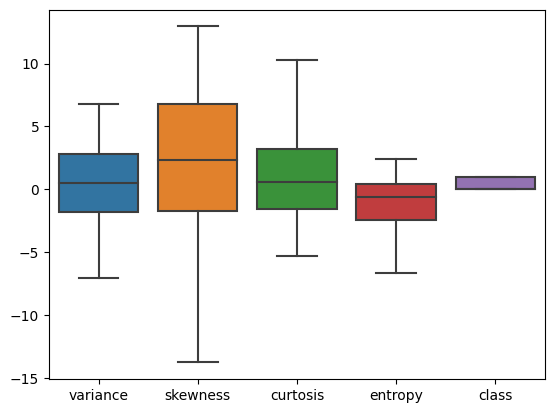

In [22]:
sns.boxplot(data=data)

In [23]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.807300,-0.44699,0
1,4.54590,8.16740,-2.458600,-1.46210,0
2,3.86600,-2.63830,1.924200,0.10645,0
3,3.45660,9.52280,-4.011200,-3.59440,0
4,0.32924,-4.45520,4.571800,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,10.310588,-2.77710,1
1370,-3.56370,-8.38270,10.310588,-1.28230,1


In [24]:
x = data.iloc[:,:-1]

In [25]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.807300,-0.44699
1,4.54590,8.16740,-2.458600,-1.46210
2,3.86600,-2.63830,1.924200,0.10645
3,3.45660,9.52280,-4.011200,-3.59440
4,0.32924,-4.45520,4.571800,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.450100,-0.55949
1368,-1.38870,-4.87730,6.477400,0.34179
1369,-3.75030,-13.45860,10.310588,-2.77710
1370,-3.56370,-8.38270,10.310588,-1.28230


In [26]:
y = data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [29]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
confusion = confusion_matrix(y_test,y_pred)

<Axes: >

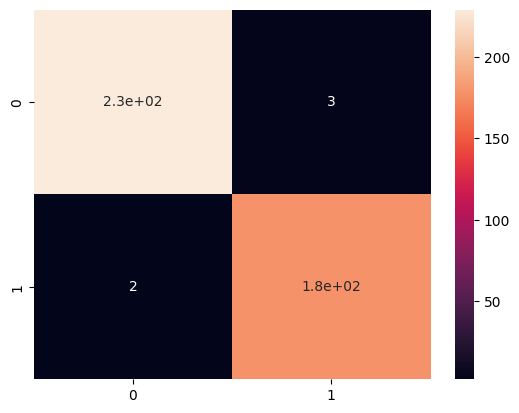

In [33]:
sns.heatmap(confusion,annot=True)

In [34]:
report = classification_report(y_test,y_pred)

In [35]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [36]:
score = accuracy_score(y_test,y_pred)

In [37]:
score

0.9878640776699029